# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q2, and one of Q1 or Q3.

**Q1.** This question provides some practice cleaning variables which have common problems.
1. Numeric variable: For `./data/airbnb_hw.csv`, clean the `Price` variable as well as you can, and explain the choices you make. How many missing values do you end up with? (Hint: What happens to the formatting when a price goes over 999 dollars, say from 675 to 1,112?)
2. Categorical variable: For the Minnesota police use of for data, `./data/mn_police_use_of_force.csv`, clean the `subject_injury` variable, handling the NA's; this gives a value `Yes` when a person was injured by police, and `No` when no injury occurred. What proportion of the values are missing? Is this a concern? Cross-tabulate your cleaned `subject_injury` variable with the `force_type` variable. Are there any patterns regarding when the data are missing? 
3. Dummy variable: For the pretrial data covered in the lecture, clean the `WhetherDefendantWasReleasedPretrial` variable as well as you can, and, in particular, replace missing values with `np.nan`.
4. Missing values, not at random: For the pretrial data covered in the lecture, clean the `ImposedSentenceAllChargeInContactEvent` variable as well as you can, and explain the choices you make. (Hint: Look at the `SentenceTypeAllChargesAtConvictionInContactEvent` variable.)

In [68]:
# 1.
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

# Create data frame from the csv file
df = pd.read_csv('./data/airbnb_hw.csv')

# Remove any dollar signs, commas, or spaces in the data
df['Price'] = df['Price'].replace('\$', '', regex=True)
df['Price'] = df['Price'].replace(',', '', regex=True)
df['Price'] = df['Price'].replace(' ', '', regex=True)

# Convert Price variable to numeric values
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Check for null/missing values
print('Missing values:', sum(df['Price'].isnull()))

# In the end we end up with zero missing values

Missing values: 0


In [ ]:
# 2.
# Create data frame from the csv file
mn = pd.read_csv('./data/mn_police_use_of_force.csv')

# Count missing values and yes/no values then find the proportion
nan = sum(mn['subject_injury'].isnull())
yn = mn['subject_injury'].count()
prop = nan / (nan + yn)
print(prop) # We see that 76% of all entries into the subject injury variable are missing - This is a major concern since it means police are not reporting injuries

# Since there are so many missing values I am going to make the nan values their own variable; the fact that they are missing gives us an important insight so it should be a value
mn['subject_injury'] = mn['subject_injury'].replace(np.nan, 'None', regex=True)
print(mn['subject_injury'].unique())
print(mn['subject_injury'].value_counts())

# Cross tabulate subject_injury with the force_type variable
pd.crosstab(mn['subject_injury'], mn['force_type'])

# We see that a large proportion of cases that involve chemical irritants, bodily force and taser tend to have missing values
# While this is also true for the less lethal projectile and maximal restraint technique columns, we see that they only have missing values which implies these cases may be assumed to cause no injury or some other outside reason, so we will not look too into these

0.7619342359767892
['None' 'No' 'Yes']
subject_injury
None    9848
Yes     1631
No      1446
Name: count, dtype: int64


force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal,Less Lethal Projectile,Maximal Restraint Technique,Police K9 Bite,Taser
subject_injury,,,,,,,,,,,
No,0,1093,131,2,33,34,0,1,0,2,150
None,2,7051,1421,0,27,74,87,0,170,31,985
Yes,2,1286,41,0,44,40,0,2,0,44,172


In [87]:
# 3.

# Import data
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url)

# Check for unique values and count them up
print(df['WhetherDefendantWasReleasedPretrial'].unique())
print(df['WhetherDefendantWasReleasedPretrial'].value_counts())

# Replace 9 with np.nan, assuming 9 is a missing value
df['WhetherDefendantWasReleasedPretrial'] = df['WhetherDefendantWasReleasedPretrial'].replace(9, np.nan, regex=True)

# Check for unique values to make sure that the missing values were correctly replaced
print(df['WhetherDefendantWasReleasedPretrial'].unique())

/tmp/ipykernel_3205/670556606.py:5: DtypeWarning: Columns (1,4,5,7,79,80,81,82,83,84,108,163,164,165,166,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,270,271,272,273,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,301,302,303,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398

[9 0 1]
WhetherDefendantWasReleasedPretrial
1    19154
0     3801
9       31
Name: count, dtype: int64
[nan  0.  1.]


In [151]:
# 4. 
# Import data
# url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
# va = pd.read_csv(url)

pd.set_option('display.max_rows', 100)  # Show up to 100 rows
pd.set_option('display.min_rows', 100)  # Prevent truncation (Asked chatgpt how to show all 100 rows in pandas and it told me to do this)

va[['ImposedSentenceAllChargeInContactEvent', 'SentenceTypeAllChargesAtConvictionInContactEvent']].head(100)  # Show first 100 rows
# This shows us that the missing values in the ImposedSentence column correlate with a 4 and 9 in the SentenceType column, so we will automatically make these a sentence of 0

# Find what character is being used as a missing value, turns out it is a space
print(sum(va['ImposedSentenceAllChargeInContactEvent'] == ' '))

# Now I will replace all missing values with an imposed sentence of 0 since we know that they all have a sentence type of either 4 or 9, presumably meaning no sentence
va['ImposedSentenceAllChargeInContactEvent'] = va['ImposedSentenceAllChargeInContactEvent'].replace(' ', 0, regex=True)


0


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

1. Open the shark attack file using Pandas. It is probably not a csv file, so `read_csv` won't work.
2. Drop any columns that do not contain data.
3. Clean the year variable. Describe the range of values you see. Filter the rows to focus on attacks since 1940. Are attacks increasing, decreasing, or remaining constant over time?
4. Clean the Age variable and make a histogram of the ages of the victims.
5. What proportion of victims are male?
6. Clean the `Type` variable so it only takes three values: Provoked and Unprovoked and Unknown. What proportion of attacks are unprovoked?
7. Clean the `Fatal Y/N` variable so it only takes three values: Y, N, and Unknown.
8. Are sharks more likely to launch unprovoked attacks on men or women? Is the attack more or less likely to be fatal when the attack is provoked or unprovoked? Is it more or less likely to be fatal when the victim is male or female? How do you feel about sharks?
9. What proportion of attacks appear to be by white sharks? (Hint: `str.split()` makes a vector of text values into a list of lists, split by spaces.)

In [165]:
# 1.
# Import data as data frame
df = pd.read_csv('./data/shark_attacks.csv')

/tmp/ipykernel_3205/3837427868.py:3: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,21,22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('./data/shark_attacks.csv')


In [166]:
# 2. 
# Drop all columns and rows where there is no data
df = df.dropna(axis=1, how='all')  
df = df.dropna(axis=0, how='all')

count    6990.000000
mean     1935.018598
std       272.082794
min         0.000000
25%      1947.000000
50%      1986.000000
75%      2009.000000
max      2026.000000
Name: Year, dtype: float64
[2025. 2024. 2026. 2023. 2022. 2021. 2020. 2019. 2018. 2017. 2016. 2015.
 2014. 2013. 2012. 2011. 2010. 2009. 2008. 2007. 2006. 2005. 2004. 2003.
 2002. 2001. 2000. 1999. 1998. 1997. 1996. 1995. 1984. 1994. 1993. 1992.
 1991. 1990. 1989. 1969. 1988. 1987. 1986. 1985. 1983. 1982. 1981. 1980.
 1979. 1978. 1977. 1976. 1975. 1974. 1973. 1972. 1971. 1970. 1968. 1967.
 1966. 1965. 1964. 1963. 1962. 1961. 1960. 1959. 1958. 1957. 1956. 1955.
 1954. 1953. 1952. 1951. 1950. 1949. 1948. 1848. 1947. 1946. 1945. 1944.
 1943. 1942. 1941. 1940. 1939. 1938. 1937. 1936. 1935. 1934. 1933. 1932.
 1931. 1930. 1929. 1928. 1927. 1926. 1925. 1924. 1923. 1922. 1921. 1920.
 1919. 1918. 1917. 1916. 1915. 1914. 1913. 1912. 1911. 1910. 1909. 1908.
 1907. 1906. 1905. 1904. 1903. 1902. 1901. 1900. 1899. 1898. 1897. 1896.
 1

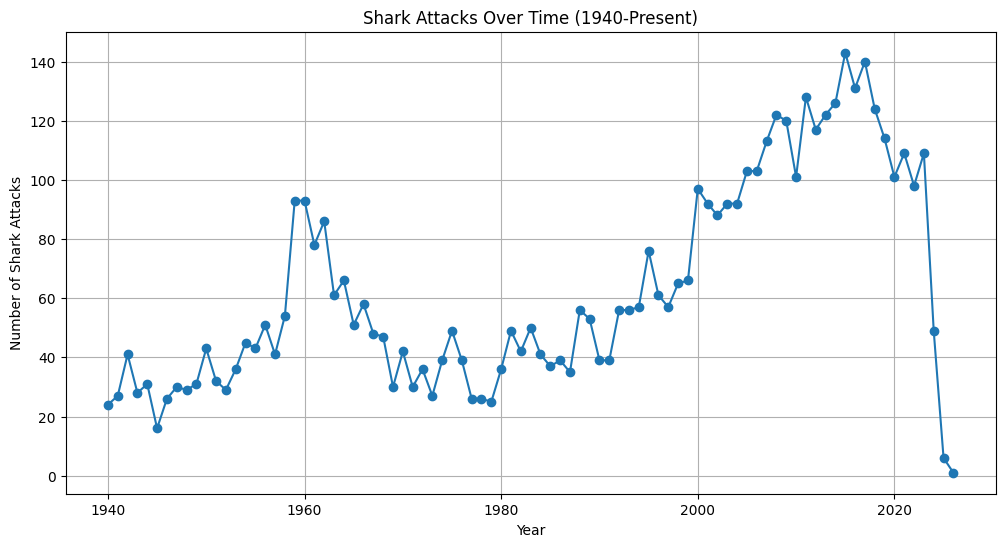

In [173]:
# 3.
# Drop NaN values in the Year column
df = df.dropna(subset=['Year'])

# Inspect the 'year' column
print(df['Year'].describe())
print(df['Year'].unique())
# Shows us that it is numeric and contains some strange values such as 77, 5, and 1000

# Filter by post 1940
df_recent = df[df['Year'] >= 1940]
print(df_recent['Year'].describe())

# Count the attacks per year
attacks = df_recent.groupby('Year').size()

# Plot this trend over time (Used chatgpt to help make this figure)
plt.figure(figsize=(12, 6))
plt.plot(attacks.index, attacks_per_year.values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Number of Shark Attacks")
plt.title("Shark Attacks Over Time (1940-Present)")
plt.grid(True)
plt.show()

# We see that attacks rose from 1940 to 60, then dropped back down before rising consistently until around 2019, then dropped to near zero
# I conclude that covid resulted in fewer attacks and then people decided to stop contributing to the data, causing it to drop to zero


['12' '37' '23' '40' '28' '69' '48' '60+' '57' '24' '45' '61' '27' '38'
 '16' '33' '30' '15' '41' '14' '26' 'Middle age' '18' '21' '49' '25' '46'
 '19' '20' '65' '64' '13' '11' '32' '29' '10' '62' '39' '22' '66' '52'
 '44' '47' '55' '59' '8' '50' '34' '30s' '9' '20/30' '35' '20s' '77' '60'
 '42' '!2' '73' '50s' '58' '67' '17' '6' '53' '68' '43' '51' '31' '40s'
 'teen' '56' 'Teen' '36' '!6' '7' '71' '54' '75' '45 and 15' '70' '4' '63'
 '28 & 22' '22, 57, 31' '60s' "20's" '74' '9 & 60' '3' '82' '72' '28 & 26'
 '5' '86' '18 or 20' '12 or 13' '46 & 34' '28, 23 & 30' 'Teens' '36 & 26'
 '8 or 10' '84' '30 or 36' '21 & ?' '33 or 37' 'mid-30s' '23 & 20' ' 30'
 '7      &    31' ' 28' '20?' "60's" '32 & 30' '16 to 18' '87' 'Elderly'
 'mid-20s' 'Ca. 33' '74 ' '45 ' '21 or 26' '20 ' '>50' '18 to 22' 'adult'
 '9 & 12' '? & 19' '25 to 35' '23 & 26' '1' '(adult)' '33 & 37' '25 or 28'
 '37, 67, 35, 27,  ? & 27' '21, 34,24 & 35' '30 & 32' '50 & 30' '17 & 35'
 '13 or 18' '34 & 19' '33 & 26' '2 to 3 mont

<Axes: >

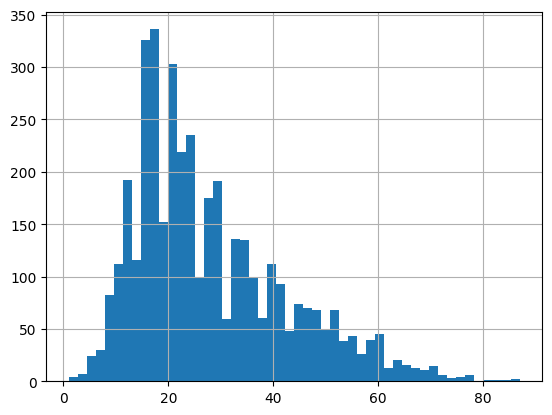

In [180]:
# 4. 
import re
# See all unique values
print(df['Age'].unique()) # Uh oh

# I was very overwhelmed so I asked chatgpt for help on how to clean up the variable

def clean_age(age):
    if pd.isnull(age) or str(age).strip() in ['?', '??', 'X', 'F', 'M', '!!', 'MAKE LINE GREEN', 'A.M.', ' ']:
        return np.nan  # Convert unknown values to NaN
    
    age = str(age).strip().lower()  # Convert to lowercase, remove whitespace

    # Handle age ranges (e.g., "16 to 18" → take average)
    if "to" in age or "-" in age:
        nums = re.findall(r'\d+', age)
        return np.mean([int(n) for n in nums]) if nums else np.nan

    # Handle multiple ages in one entry (e.g., "28 & 22" → take first)
    if "&" in age or "," in age:
        nums = re.findall(r'\d+', age)
        return int(nums[0]) if nums else np.nan

    # Handle text-based ages
    if "teen" in age:
        return 16  # Assume mid-teen age
    if "middle" in age or "mid-30s" in age:
        return 35  # Assume mid-30s
    if "young" in age:
        return 20  # Assume young adult
    if "elderly" in age or "old" in age:
        return 70  # Assume elderly age
    if "adult" in age:
        return 30  # Assume generic adult
    if "months" in age or "½" in age:
        return np.nan  # Ignore very young ages

    # Handle 60+, 50s, 20s formats
    nums = re.findall(r'\d+', age)
    if nums:
        return int(nums[0])  # Extract first numeric value

    return np.nan  # If all else fails, return NaN

# Apply cleaning function
df['Cleaned_Age'] = df['Age'].apply(clean_age)

# Convert to integer where possible
df['Cleaned_Age'] = pd.to_numeric(df['Cleaned_Age'], errors='coerce')

# Drop NaN values
df = df.dropna(subset=['Cleaned_Age'])

# Create histogram
df['Cleaned_Age'].hist(bins=50)


In [196]:
# 5. 
# See unique values
df['Sex'].unique()

# Fix mistakes
df['Sex'] = df['Sex'].replace(' M', 'M', regex=True)
df['Sex'] = df['Sex'].replace('M ', 'M', regex=True)
df['Sex'] = df['Sex'].replace('lli', np.nan, regex=True)

# See counts
df['Sex'].value_counts()

# Calculate proportion
prop = 3353 / (3353 + 585)
print(f"The proportion of male victims is {round(prop, 2)}")

The proportion of male victims is 0.85


In [202]:
# 6. 
# See unique values
df['Type'].unique()
df['Type'].value_counts()

# Make it so there are only Unprovoked, Provoked, and Unknown values
df['Type'] = df['Type'].replace('Invalid', 'Unknown', regex=True)
df['Type'] = df['Type'].replace('Watercraft', 'Provoked', regex=True) # Assuming watercraft means provoked by watercraft
df['Type'] = df['Type'].replace('Sea Disaster', 'Provoked', regex=True) # Assuming sea disaster means provoked by sea disaster
df['Type'] = df['Type'].replace('Questionable', 'Unknown', regex=True)
df['Type'] = df['Type'].replace('?', 'Unknown')
df['Type'] = df['Type'].replace('Under investigation', 'Unknown', regex=True)

# Check again
df['Type'].unique()
df['Type'].value_counts()

# Calculate proportion
prop = 3297 / (3297 + 413 + 258)
print(f"The proportion of unprovoked attacks is {round(prop, 2)}")

The proportion of unprovoked attacks is 0.83


In [216]:
# 7. 
# See unique values
df['Fatal Y/N'].unique()
df['Fatal Y/N'].value_counts()

# Make it so there are only Y, N, and Unknown values
df['Fatal Y/N'] = df['Fatal Y/N'].replace(' N', 'N', regex=True)
df['Fatal Y/N'] = df['Fatal Y/N'].replace('F', 'N', regex=True) 
df['Fatal Y/N'] = df['Fatal Y/N'].replace('n', 'N', regex=True) 
df['Fatal Y/N'] = df['Fatal Y/N'].replace('2017', np.nan, regex=True)
df['Fatal Y/N'] = df['Fatal Y/N'].replace('M', 'Unknown', regex=True) # Assuming M means maybe
df['Fatal Y/N'] = df['Fatal Y/N'].replace('UNKNOWN', 'Unknown', regex=True)
df['Fatal Y/N'] = df['Fatal Y/N'].replace('UNKNOWN', 'Unknown', regex=True)
df['Fatal Y/N'] = df['Fatal Y/N'].replace('UNkNowN', 'Unknown', regex=True)

# Check again
df['Fatal Y/N'].unique()
df['Fatal Y/N'].value_counts()


Fatal Y/N
N          3043
Y           686
Unknown      11
Name: count, dtype: int64

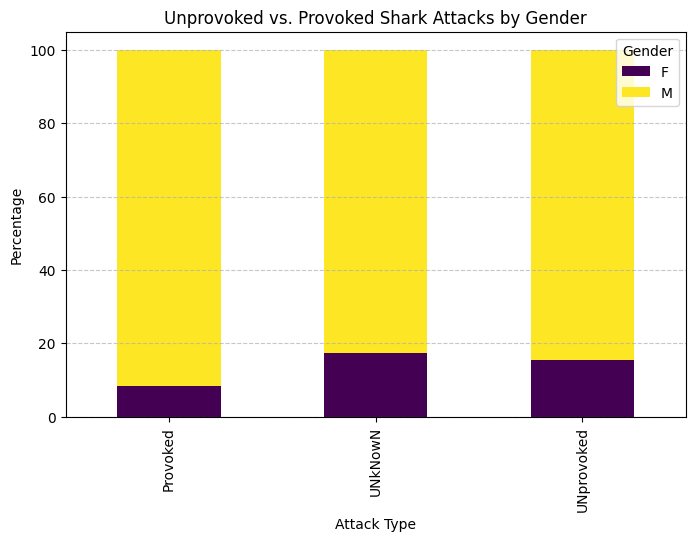

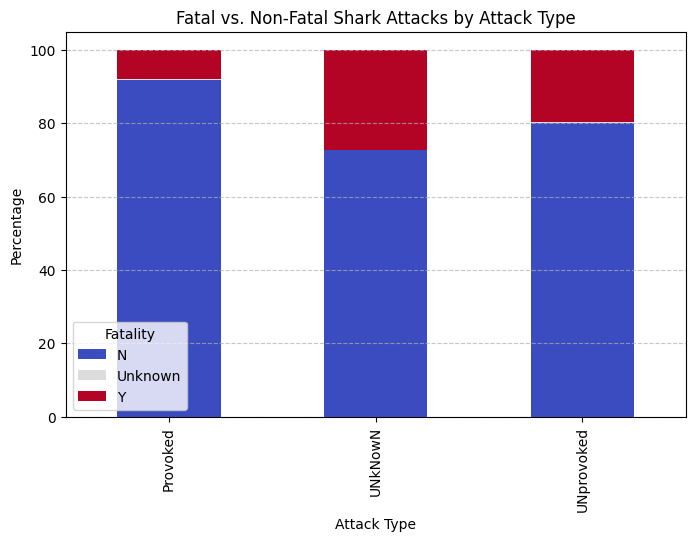

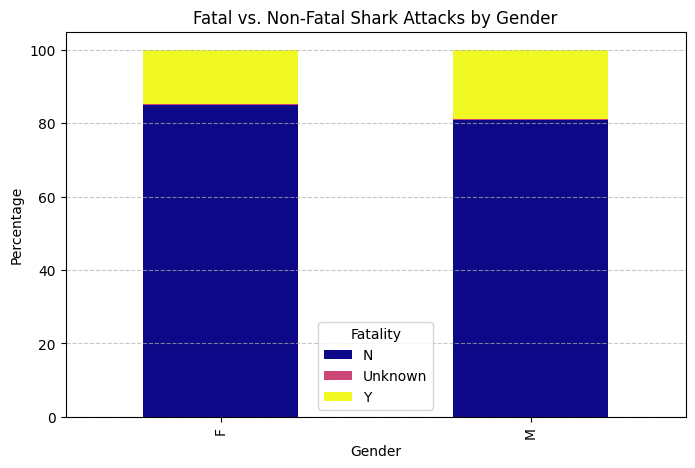

In [ ]:
# 8. 

# Plot of crosstabulation for  of 'Type' and 'Sex' 
unprovoked_by_sex = pd.crosstab(df["Type"], df["Sex"], normalize="index") * 100
unprovoked_by_sex.plot(kind="bar", figsize=(8, 5), stacked=True, colormap="viridis")
plt.title("Unprovoked vs. Provoked Shark Attacks by Gender")
plt.xlabel("Attack Type")
plt.ylabel("Percentage")
plt.legend(title="Gender")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()
# I asked chatgpt to make this plot and then applied it to the other variables

# Same for 'Type' and 'Fatal Y/N'
fatal_by_type = pd.crosstab(df["Type"], df["Fatal Y/N"], normalize="index") * 100
fatal_by_type.plot(kind="bar", figsize=(8, 5), stacked=True, colormap="coolwarm")
plt.title("Fatal vs. Non-Fatal Shark Attacks by Attack Type")
plt.xlabel("Attack Type")
plt.ylabel("Percentage")
plt.legend(title="Fatality")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()


# Same for 'Sex' and 'Fatal Y/N'
fatal_by_sex = pd.crosstab(df["Sex"], df["Fatal Y/N"], normalize="index") * 100
fatal_by_sex.plot(kind="bar", figsize=(8, 5), stacked=True, colormap="plasma")
plt.title("Fatal vs. Non-Fatal Shark Attacks by Gender")
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.legend(title="Fatality")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# I am scared of sharks


In [251]:
# 9. 
# Remove space from Species column name
df = df.rename(columns={'Species ': 'Species'})

# See that there are many names
df['Species'].unique()

# Clean species for great white shark mentions
def clean_species(species):
    species = str(species).strip().lower()
    if 'white' in species:
           return 'White Shark'
    else:
          return 'Not'

# Apply the function
df['Cleaned_species'] = df['Species'].apply(clean_species)

# Drop NaN values
df = df.dropna(subset=['Cleaned_species'])

df['Cleaned_species'].value_counts()

# Calculate proportion
prop = 497 / (497 + 3481)
print(f'The proportion of shark attacks that appear to be by White Sharks is {round(prop, 2)}')


The proportion of shark attacks that appear to be by White Sharks is 0.12


**Q3.** Open the "tidy_data.pdf" document in the repo, which is a paper called Tidy Data by Hadley Wickham.

  1. Read the abstract. What is this paper about?
  2. Read the introduction. What is the "tidy data standard" intended to accomplish?
  3. Read the intro to section 2. What does this sentence mean: "Like families, tidy datasets are all alike but every messy dataset is messy in its own way." What does this sentence mean: "For a given dataset, it’s usually easy to figure out what are observations and what are variables, but it is surprisingly difficult to precisely define variables and observations in general."
  4. Read Section 2.2. How does Wickham define values, variables, and observations?
  5. How is "Tidy Data" defined in section 2.3?
  6. Read the intro to Section 3 and Section 3.1. What are the 5 most common problems with messy datasets? Why are the data in Table 4 messy? What is "melting" a dataset?
  7. Why, specifically, is table 11 messy but table 12 tidy and "molten"?
  8. Read Section 6. What is the "chicken-and-egg" problem with focusing on tidy data? What does Wickham hope happens in the future with further work on the subject of data wrangling?

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. How did the most recent US Census gather data on race?
2. Why do we gather these data? What role do these kinds of data play in politics and society? Why does data quality matter?
3. Please provide a constructive criticism of how the Census was conducted: What was done well? What do you think was missing? How should future large scale surveys be adjusted to best reflect the diversity of the population? Could some of the Census' good practices be adopted more widely to gather richer and more useful data?
4. How did the Census gather data on sex and gender? Please provide a similar constructive criticism of their practices.
5. When it comes to cleaning data, what concerns do you have about protected characteristics like sex, gender, sexual identity, or race? What challenges can you imagine arising when there are missing values? What good or bad practices might people adopt, and why?
6. Suppose someone invented an algorithm to impute values for protected characteristics like race, gender, sex, or sexuality. What kinds of concerns would you have?